In [ ]:
 # Dados _ Penalidades aplicadas a operadoras

# O conjunto de dados não contempla as arrecadações a partir de maio de 2018 dos valores inscritos em Dívida, data em que 
# esses recebimentos passaram a ser controlados pelo SAPIENS, sistema utilizado pela Procuradoria-Geral Federal 
# Estão incluídos apenas os processos sancionadores nos quais foi aplicada multa em primeira ou segunda instância,
# mesmo que já tenha sido cancelada. Foram excluídos os pagamentos referentes às GRUs arrecadadas em Dívida Ativa.

In [1]:
# importando o pandas
import pandas as pd

In [3]:
# importando pacotes para graficos
import matplotlib.pyplot as plt

In [6]:
import seaborn as sns

In [30]:
path = "C:/Users/noturno/Desktop/DATA-SCIENCE-E-BUSINESS-INTELLIGENCE/turma2/datasets/"

In [38]:
df_mark = pd.read_csv(path + 'penalidades_aplicadas_a_operadoras.csv',sep=';', encoding='ISO-8859-1')

In [121]:
# Converter a coluna 'RAZAO_SOCIAL' para string
df_mark['RAZAO_SOCIAL'] = df_mark['RAZAO_SOCIAL'].astype(str)

In [75]:
# Converter colunas de data automaticamente com formato especificado
for col in df_mark.columns:
    if df_mark[col].dtype == 'object':  # Verifica se a coluna é do tipo texto
        try:
            # Tenta converter para datetime, especificando o formato
            df_mark[col] = pd.to_datetime(df_mark[col], format='%d/%m/%Y', errors='coerce')  # Ajuste o formato conforme necessário
        except:
            pass  # Se não for uma data, segue para o próximo

# Converter colunas de valores monetários (como 'R$' para float)
for col in df_mark.columns:
    if df_mark[col].dtype == 'object':  # Verifica se a coluna é do tipo texto
        try:
            # Tenta converter para valores monetários
            df_mark[col] = df_mark[col].replace({'R$': '', ',': '.'}, regex=True).astype(float)
        except:
            pass  # Se não for um valor monetário, segue para o próximo

In [44]:
# Remover linhas com valores nulos
df_cleaned = df_mark.dropna()

In [50]:
# remover colunas em branco
df_cleaned = df_mark.dropna(axis=1)

In [97]:
# Ajustar as configurações de exibição do pandas para exibir todas as colunas
pd.set_option('display.max_columns', None)  # Exibe todas as colunas
pd.set_option('display.max_rows', None)  # Exibe todas as linhas, se necessário
pd.set_option('display.max_colwidth', None)  # Exibe o conteúdo completo das colunas de texto

In [123]:
df_mark.head()

,NR_DEMANDA,NR_PROCESSO,TIPO_PROCESSO,OBJETO,CD_OPERADORA,CNPJ,RAZAO_SOCIAL,SITUACAO_OPERADORA,STATUS_DEMANDA,DT_DECISAO_1A,DT_PUBLICACAO_1A,DT_PUBLICACAO_1A_FINAL,VL_MULTA_FIXA_1A,VL_MULTA_DIARIA_1A,VL_TOTAL_APLICADO_1A,DT_CIENCIA_RECONSIDERA_TOTAL,DT_DECISAO_2A,DT_PUBLICACAO_2A,TIPO_DECISAO_2A,VL_MULTA_FIXA_2A,VL_MULTA_DIARIA_2A,VL_TOTAL_APLICADO_2A,VL_MULTA_FINAL_APLICADA,VL_TOTAL_DESCONTOS,DT_ARQUIVAMENTO,MOTIVO_ARQUIVAMENTO,TIPO_PENALIDADE,DT_SUSPENSAO_ADM,DT_SUSPENSAO_JUD,NR_GRU,DT_VENC_GRU,VL_GRU,DE_SITUACAO_GRU,DT_PAGTO_A_VISTA_ANS,VL_PAGO_A_VISTA_ANS,DT_VENC_1A_PARC_ANS,VL_PARCELAS_ANS_PAGAS,STATUS_PARCELAMENTO,DT_INSCRICAO,INSCRITO_DA,ORIGEM_PAGAMENTO,NR_COMPETENCIA_CARGA
0,6041550,NaT,NaT,NaT,359017.0,NaT,NaT,1.0,NaT,2024-09-30,2024-03-10,2024-03-10,60000,0,60000,NaT,NaT,NaT,NaT,0,0,0,60000,24000.0,NaT,NaT,NaT,NaT,NaT,NaT,2024-11-21,36000.0,NaT,NaT,NaN,NaT,NaN,NaT,NaT,NaT,NaT,202410
1,5423853,NaT,NaT,NaT,359017.0,NaT,NaT,1.0,NaT,2024-04-05,2024-05-04,2024-05-04,240000,0,240000,NaT,NaT,NaT,NaT,0,0,0,240000,96000.0,2024-06-08,NaT,NaT,NaT,NaT,NaT,2024-05-13,144000.0,NaT,2024-08-05,144000.0,NaT,NaN,NaT,NaT,NaT,NaT,202410
2,5735088,NaT,NaT,NaT,359017.0,NaT,NaT,1.0,NaT,2024-09-17,NaT,NaT,88000,0,88000,NaT,NaT,NaT,NaT,0,0,0,88000,NaN,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaN,NaT,NaT,NaN,NaT,NaN,NaT,NaT,NaT,NaT,202410
3,395120,NaT,NaT,NaT,359556.0,NaT,NaT,2.0,NaT,2009-05-13,NaT,NaT,12000,0,12000,NaT,NaT,NaT,NaT,0,0,0,12000,NaN,NaT,NaT,NaT,NaT,NaT,NaT,2013-06-28,18707.0,NaT,NaT,NaN,NaT,NaN,NaT,2013-05-08,NaT,NaT,202410
4,5186750,NaT,NaT,NaT,359017.0,NaT,NaT,1.0,NaT,2021-09-20,NaT,NaT,30000,0,30000,NaT,NaT,NaT,NaT,0,0,0,30000,12000.0,NaT,NaT,NaT,NaT,NaT,NaT,2021-10-25,18000.0,NaT,NaT,18000.0,NaT,NaN,NaT,NaT,NaT,NaT,202410


In [141]:
# Verificar os tipos de dados novamente
print(df_mark.dtypes)

NR_DEMANDA                               int64
NR_PROCESSO                     datetime64[ns]
TIPO_PROCESSO                   datetime64[ns]
OBJETO                          datetime64[ns]
CD_OPERADORA                           float64
CNPJ                            datetime64[ns]
RAZAO_SOCIAL                            object
SITUACAO_OPERADORA                     float64
STATUS_DEMANDA                  datetime64[ns]
DT_DECISAO_1A                   datetime64[ns]
DT_PUBLICACAO_1A                datetime64[ns]
DT_PUBLICACAO_1A_FINAL          datetime64[ns]
VL_MULTA_FIXA_1A                         int64
VL_MULTA_DIARIA_1A                       int64
VL_TOTAL_APLICADO_1A                     int64
DT_CIENCIA_RECONSIDERA_TOTAL    datetime64[ns]
DT_DECISAO_2A                   datetime64[ns]
DT_PUBLICACAO_2A                datetime64[ns]
TIPO_DECISAO_2A                 datetime64[ns]
VL_MULTA_FIXA_2A                         int64
VL_MULTA_DIARIA_2A                       int64
VL_TOTAL_APLI

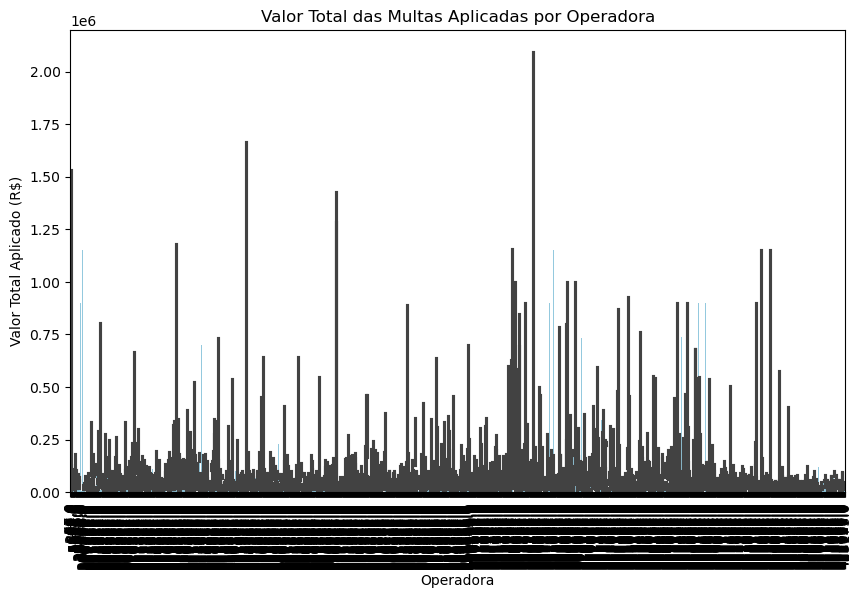

In [67]:
# Qual o valor total das multas aplicadas por operadora?
plt.figure(figsize=(10, 6))
sns.barplot(x='CD_OPERADORA', y='VL_TOTAL_APLICADO_1A', data=df_mark,  color='skyblue')
plt.title('Valor Total das Multas Aplicadas por Operadora')
plt.xlabel('Operadora')
plt.ylabel('Valor Total Aplicado (R$)')
plt.xticks(rotation=90)  # Para girar as labels das operadoras se necessário
plt.show()

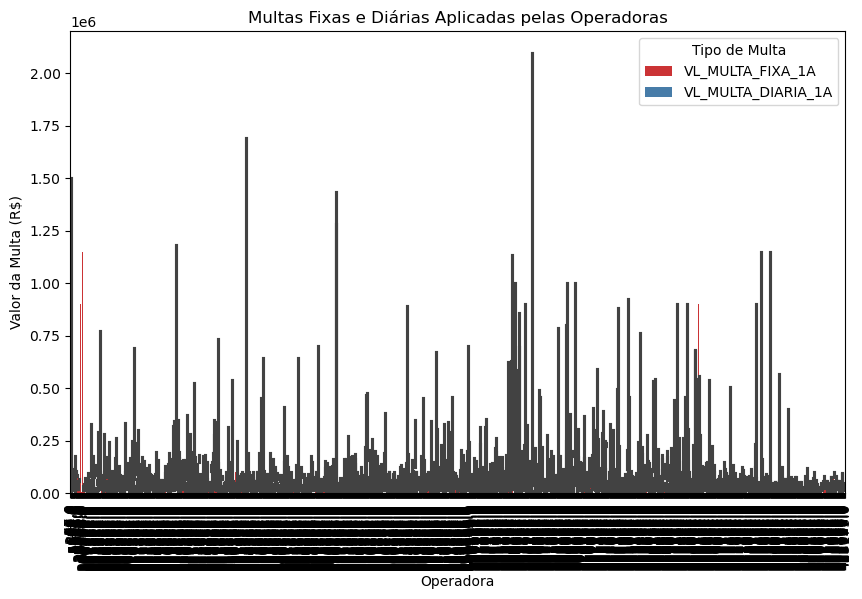

In [103]:
# Qual o valor das multas fixas e diárias aplicadas pelas operadoras?
plt.figure(figsize=(10, 6))
df_melted = df_mark[['CD_OPERADORA', 'VL_MULTA_FIXA_1A', 'VL_MULTA_DIARIA_1A']].melt(id_vars='CD_OPERADORA', 
                                                                               value_vars=['VL_MULTA_FIXA_1A', 'VL_MULTA_DIARIA_1A'], 
                                                                               var_name='Tipo de Multa', 
                                                                               value_name='Valor')
sns.barplot(x='CD_OPERADORA', y='Valor', hue='Tipo de Multa', data=df_melted, palette='Set1')
plt.title('Multas Fixas e Diárias Aplicadas pelas Operadoras')
plt.xlabel('Operadora')
plt.ylabel('Valor da Multa (R$)')
plt.xticks(rotation=90)
plt.show()

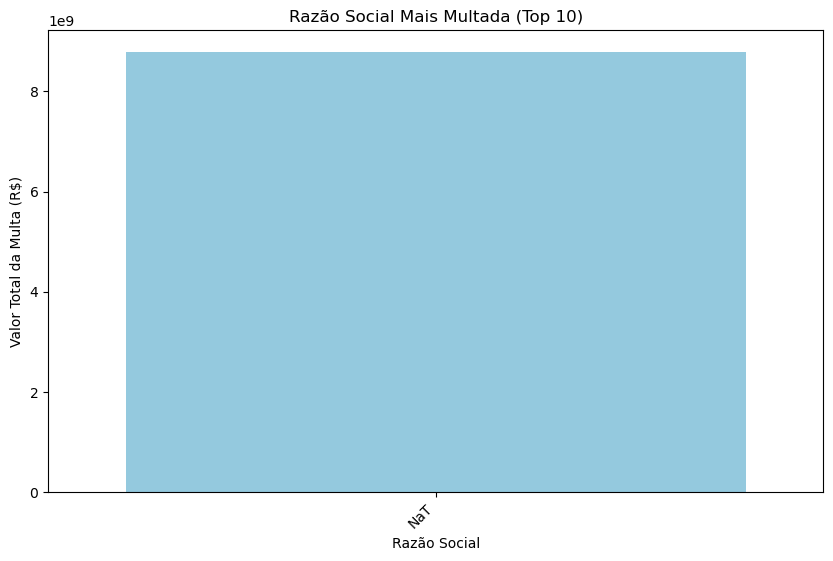

In [147]:
# Substituir valores nulos na coluna 'RAZAO_SOCIAL' por 'Desconhecido'
df_mark['RAZAO_SOCIAL'] = df_mark['RAZAO_SOCIAL'].fillna('Desconhecido')

# Garantir que 'VL_TOTAL_APLICADO_1A' seja numérico e tratar valores inválidos
df_mark['VL_TOTAL_APLICADO_1A'] = pd.to_numeric(df_mark['VL_TOTAL_APLICADO_1A'], errors='coerce')

# Remover as linhas com valores nulos em 'VL_TOTAL_APLICADO_1A'
df_mark = df_mark.dropna(subset=['VL_TOTAL_APLICADO_1A'])

# Agrupar por 'RAZAO_SOCIAL' e somar as multas
df_agrupado = df_mark.groupby('RAZAO_SOCIAL')['VL_TOTAL_APLICADO_1A'].sum().reset_index()

# Ordenar para mostrar as 10 operadoras com maiores multas
df_agrupado = df_agrupado.sort_values(by='VL_TOTAL_APLICADO_1A', ascending=False).head(10)

# Criar o gráfico de barras verticais
plt.figure(figsize=(10, 6))
sns.barplot(x='RAZAO_SOCIAL', y='VL_TOTAL_APLICADO_1A', data=df_agrupado, color='skyblue')
plt.title('Razão Social Mais Multada (Top 10)')
plt.xlabel('Razão Social')
plt.ylabel('Valor Total da Multa (R$)')
plt.xticks(rotation=45, ha='right')  # Rotaciona os rótulos do eixo x para melhor leitura
plt.show()